In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


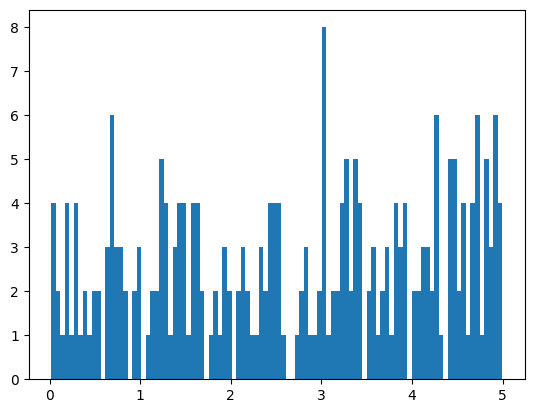

In [29]:
y = np.random.uniform(0.0, 5.0, 250)

plt.hist(y, 100)

plt.show()

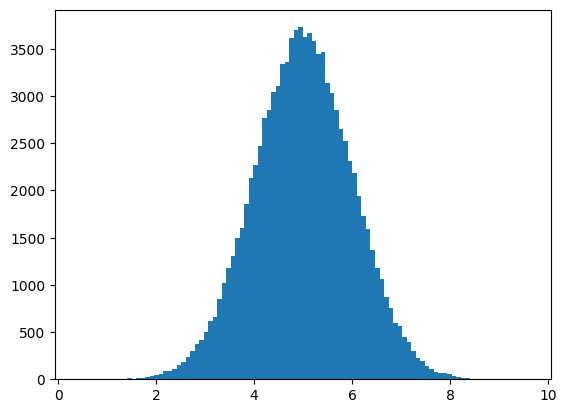

In [40]:
y = np.random.normal(5.0, 1.0, 100000)

plt.hist(y, 100)

plt.show()

R Value: -0.758591524376155
Predicted Speed at x=8: 89.09565857247976


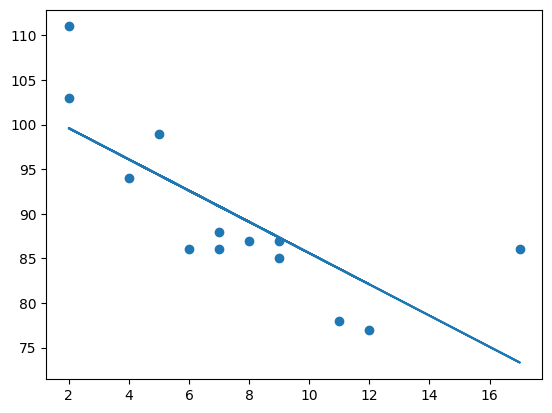

In [54]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

print(f"R Value:", r)

speed = myfunc(8)
print(f"Predicted Speed at x=8:", speed)

plt.scatter(x,y)
plt.plot(x, mymodel)

plt.show()

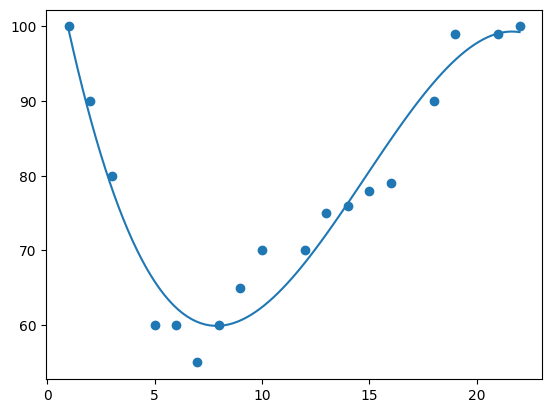

In [89]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x,y,3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

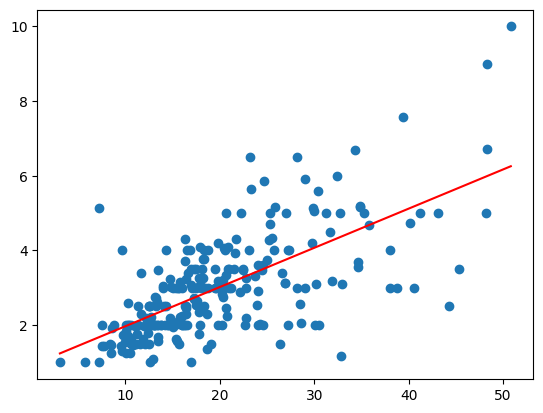

0.45661658635167685
0.45661658635167646


In [95]:
data = pd.read_csv('tips.csv')

data = data.sort_values("total_bill")

total_bill = data["total_bill"]
tip = data["tip"]

plt.scatter(total_bill, tip)

slope, intercept, r, p, std_err = stats.linregress(total_bill, tip)

def myfunction(x):
    return slope * x + intercept

mymodel = list(map(myfunction, total_bill))

plt.plot(total_bill, mymodel, color = 'r')

plt.show()

print(r ** 2)
print(r2_score(tip, mymodel))


In [144]:
data2 = pd.read_csv('data.csv')

x = data2[['Weight', 'Volume']]
y = data2['CO2']

scale = StandardScaler()
scaledX = scale.fit_transform(x)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1300]])

predictedCO2 = regr.predict([scaled[0]])

print(predictedCO2)
#print(regr.coef_)

[107.2087328]


c:\Users\Brad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


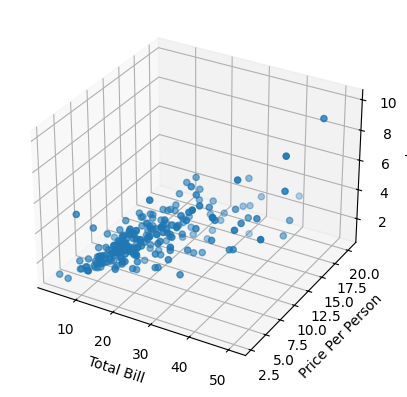

In [196]:
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('tips.csv')
x = data["total_bill"]
z = data["tip"]
y = data["price_per_person"]

threeDee_plot = plt.figure().add_subplot(projection = '3d')
threeDee_plot.scatter(x, y, z)
threeDee_plot.set_xlabel('Total Bill')
threeDee_plot.set_zlabel('Tip')
threeDee_plot.set_ylabel('Price Per Person')

plt.show()


In [186]:
data = pd.read_csv('tips.csv')

x = data[["total_bill", "price_per_person"]]
y = data["tip"]

scale = StandardScaler()
scaledX = scale.fit_transform(x)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

# scaled = scale.transform([[16.99, 4.49]])
# predicted_tip = regr.predict([scaled[0]])

total_loss = 0
for index in x.index:
    scaled = scale.transform([[data["total_bill"][index], data["price_per_person"][index]]])

    actual = data["tip"][index]
    predicted = regr.predict([scaled[0]])

    loss = (actual - predicted) ** 2
    # print(loss)
    total_loss += loss

print((total_loss) / len(data))

print(mean_squared_error(y, regr.predict(scaledX)))


[1.00932376]
1.0093237641523394


c:\Users\Brad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Brad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Brad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Brad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Brad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler wa

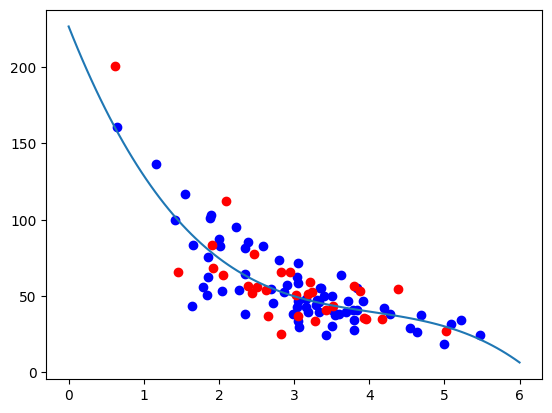

0.7087309871415024
0.7417030624892555
49.88098366223687


In [37]:
np.random.seed(4)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:70]
train_y = y[:70]

test_x = x[70:]
test_y = y[70:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 3))
myline = np.linspace(0, 6, 100)

plt.plot(myline, mymodel(myline))
plt.scatter(train_x, train_y, color = 'blue')
plt.scatter(test_x, test_y, color = "red")
plt.show()

print(r2_score(train_y, mymodel(train_x)))
print(r2_score(test_y, mymodel(test_x)))

print(mymodel(3))
